# UK House Price EDA


The data for this project is taken from https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads. 

Contains HM Land Registry data © Crown copyright and database right 2021. This data is licensed under the Open Government Licence v3.0.



We begin by using the data from years 2023-2025 as a smaller sample size, which can be extended to larger data sets once the methodology has been verified. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


### Importing Raw data

In [32]:
cols = [
    "transaction_id",
    "price",
    "date_of_transfer",
    "postcode",
    "property_type",
    "new_build_flag",
    "tenure",
    "primary_addressable_object_name",
    "secondary_addressable_object_name",
    "street",
    "locality",
    "town_or_city",
    "district",
    "county",
    "transaction_category",
    "record_status",  # 16th field in the file
]

raw_df_25 = pd.read_csv("..\\data\\raw\\pp-2025.csv", header=None, names=cols)
raw_df_24 = pd.read_csv("..\\data\\raw\\pp-2024.csv", header=None, names=cols)
raw_df_23 = pd.read_csv("..\\data\\raw\\pp-2023.csv", header=None, names=cols)

frames = [raw_df_25, raw_df_24, raw_df_23]
raw_df = pd.concat(frames)

Logic check for the size of the combined file.

In [36]:
print(f"Number of Rows: {raw_df_25.shape[0]}, Number of Columns: {raw_df_25.shape[1]}" )
print(f"Number of Rows: {raw_df_24.shape[0]}, Number of Columns: {raw_df_24.shape[1]}" )
print(f"Number of Rows: {raw_df_23.shape[0]}, Number of Columns: {raw_df_23.shape[1]}" )
print(f"Number of Rows: {raw_df.shape[0]}, Number of Columns: {raw_df.shape[1]}" )



Number of Rows: 446867, Number of Columns: 16
Number of Rows: 881757, Number of Columns: 16
Number of Rows: 855766, Number of Columns: 16
Number of Rows: 2184390, Number of Columns: 16


Since this will mainly 

In [25]:
raw_df.head()

,transaction_id,price,date_of_transfer,postcode,property_type,new_build_flag,tenure,primary_addressable_object_name,secondary_addressable_object_name,street,locality,town_or_city,district,county,transaction_category,record_status
0,{3DCCB7C9-94EA-5B9D-E063-4704A8C0331E},451225,2025-07-31 00:00,N15 4AB,F,N,L,288,NaN,PHILIP LANE,NaN,LONDON,HARINGEY,GREATER LONDON,A,A
1,{3DCCB7C9-94EB-5B9D-E063-4704A8C0331E},485000,2025-01-20 00:00,N4 4NR,F,N,L,CONNAUGHT LODGE,FLAT 19,CONNAUGHT ROAD,NaN,LONDON,HARINGEY,GREATER LONDON,A,A
2,{3DCCB7C9-94ED-5B9D-E063-4704A8C0331E},380000,2025-03-20 00:00,N21 3AN,T,N,L,41A,NaN,FERNLEIGH ROAD,NaN,LONDON,ENFIELD,GREATER LONDON,A,A
3,{3DCCB7C9-94EE-5B9D-E063-4704A8C0331E},730000,2025-03-27 00:00,EN5 3LT,S,N,F,3,NaN,HAYDEN CLOSE,NaN,BARNET,BARNET,GREATER LONDON,A,A
4,{3DCCB7C9-94F0-5B9D-E063-4704A8C0331E},325000,2025-03-28 00:00,EN5 1HY,F,N,L,"LANDER COURT, 48",2,LYONSDOWN ROAD,NEW BARNET,BARNET,BARNET,GREATER LONDON,A,A


In [26]:
raw_df.tail()

,transaction_id,price,date_of_transfer,postcode,property_type,new_build_flag,tenure,primary_addressable_object_name,secondary_addressable_object_name,street,locality,town_or_city,district,county,transaction_category,record_status
855761,{06C9F487-585E-9388-E063-4804A8C0BD98},172500,2023-03-03 00:00,CM8 2AW,F,N,L,WHITEHALL COURT,FLAT 28,NEWLAND STREET,NaN,WITHAM,BRAINTREE,ESSEX,A,A
855762,{06C9F487-585F-9388-E063-4804A8C0BD98},375000,2023-08-17 00:00,CM8 2DJ,S,N,F,20,NaN,THE AVENUE,NaN,WITHAM,BRAINTREE,ESSEX,A,A
855763,{06C9F487-5860-9388-E063-4804A8C0BD98},610000,2023-08-22 00:00,CO3 3NR,D,N,F,41,NaN,CAMBRIDGE ROAD,NaN,COLCHESTER,COLCHESTER,ESSEX,A,A
855764,{06C9F487-5861-9388-E063-4804A8C0BD98},525000,2023-07-31 00:00,CM15 9NP,S,N,F,12,NaN,ELIZABETH ROAD,PILGRIMS HATCH,BRENTWOOD,BRENTWOOD,ESSEX,A,A
855765,{06C9F487-5862-9388-E063-4804A8C0BD98},326000,2023-07-28 00:00,SS13 1JH,S,N,F,30,NaN,CHARLESTON AVENUE,NaN,BASILDON,BASILDON,ESSEX,A,A


### Cleaning the data frame

In [41]:
raw_df.isnull().sum()

transaction_id                             0
price                                      0
date_of_transfer                           0
postcode                                5198
property_type                              0
new_build_flag                             0
tenure                                     0
primary_addressable_object_name            0
secondary_addressable_object_name    1903281
street                                 34234
locality                             1358424
town_or_city                               0
district                                   0
county                                     0
transaction_category                       0
record_status                              0
dtype: int64

From this it can be seen that there are NA entries in postcode, secondary_addressable_object_name, street and locality. Here we are only concerened with the postcode as the SOAN and locality are not usable due to proportion of NA entries, and street does not add anything in particular to our analysis. 

In [ ]:
# Removing the rows that have a deleted record status as they should not be included in analysis.
raw_df = raw_df[raw_df["record_status"] != "D"]

# Remove the rows where the postcode is NA 
raw_df = raw_df.dropna(axis = 0, subset=("postcode"))


(2184390, 16)
(2179192, 16)


In [43]:
raw_df.isnull().sum()

transaction_id                             0
price                                      0
date_of_transfer                           0
postcode                                   0
property_type                              0
new_build_flag                             0
tenure                                     0
primary_addressable_object_name            0
secondary_addressable_object_name    1899358
street                                 33410
locality                             1355862
town_or_city                               0
district                                   0
county                                     0
transaction_category                       0
record_status                              0
dtype: int64

In [ ]:
# Dropping unecassary columns for this EDA.
to_drop = ["transaction_id", "secondary_addressable_object_name", "street", "locality", "transaction_category"]
df = raw_df.drop(to_drop, axis=1)

In [45]:
df.head()

,price,date_of_transfer,postcode,property_type,new_build_flag,tenure,primary_addressable_object_name,town_or_city,district,county,record_status
0,451225,2025-07-31 00:00,N15 4AB,F,N,L,288,LONDON,HARINGEY,GREATER LONDON,A
1,485000,2025-01-20 00:00,N4 4NR,F,N,L,CONNAUGHT LODGE,LONDON,HARINGEY,GREATER LONDON,A
2,380000,2025-03-20 00:00,N21 3AN,T,N,L,41A,LONDON,ENFIELD,GREATER LONDON,A
3,730000,2025-03-27 00:00,EN5 3LT,S,N,F,3,BARNET,BARNET,GREATER LONDON,A
4,325000,2025-03-28 00:00,EN5 1HY,F,N,L,"LANDER COURT, 48",BARNET,BARNET,GREATER LONDON,A


In [ ]:
df.tail()

,price,date_of_transfer,postcode,property_type,new_build_flag,tenure,primary_addressable_object_name,town_or_city,district,county,record_status
855761,172500,2023-03-03 00:00,CM8 2AW,F,N,L,WHITEHALL COURT,WITHAM,BRAINTREE,ESSEX,A
855762,375000,2023-08-17 00:00,CM8 2DJ,S,N,F,20,WITHAM,BRAINTREE,ESSEX,A
855763,610000,2023-08-22 00:00,CO3 3NR,D,N,F,41,COLCHESTER,COLCHESTER,ESSEX,A
855764,525000,2023-07-31 00:00,CM15 9NP,S,N,F,12,BRENTWOOD,BRENTWOOD,ESSEX,A
855765,326000,2023-07-28 00:00,SS13 1JH,S,N,F,30,BASILDON,BASILDON,ESSEX,A


In [47]:
df.isnull().sum()

price                              0
date_of_transfer                   0
postcode                           0
property_type                      0
new_build_flag                     0
tenure                             0
primary_addressable_object_name    0
town_or_city                       0
district                           0
county                             0
record_status                      0
dtype: int64

In [51]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")

## Analysis

In [62]:
df["price"].describe()


count    2.179192e+06
mean     3.906148e+05
std      1.286586e+06
min      1.000000e+00
25%      1.800000e+05
50%      2.800000e+05
75%      4.250000e+05
max      6.953515e+08
Name: price, dtype: float64

Text(0.5, 1.0, 'Distribution of log10(Price)')

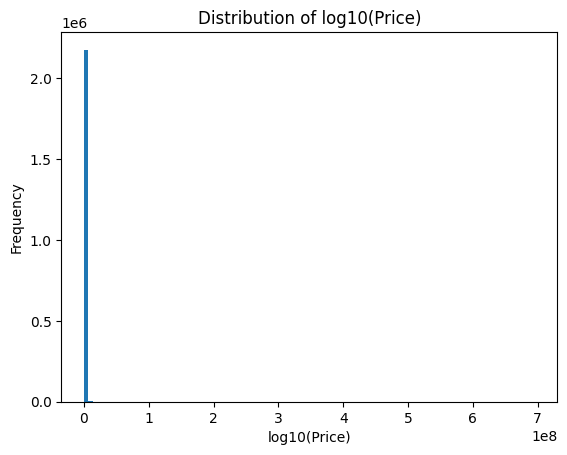

In [67]:
plt.hist(df["price"], bins=100)
plt.xlabel("Price")
plt.ylabel("Counts")

log_price = np.log10(df["price"])

plt.hist(log_price, bins=1000)
plt.xlabel("log10(Price)")
plt.ylabel("Frequency")
plt.title("Distribution of log10(Price)")


In [ ]:
clip 